In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Read the dataset
df = pd.read_csv('C:\\Users\\taiphan\\Documents\\01\\data\\StudentsPerformance.csv')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Analysis of Learning Outcomes

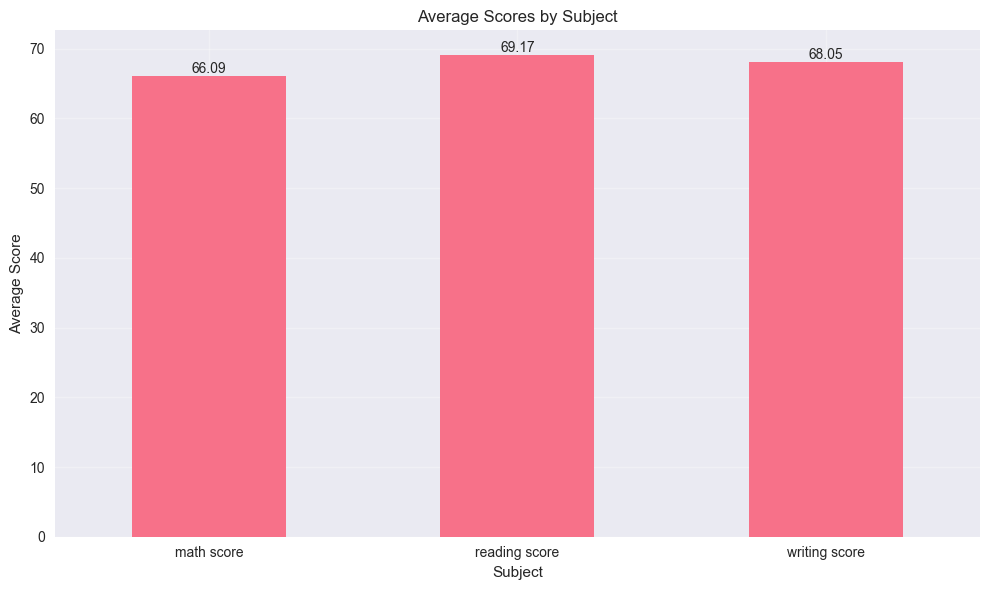

In [6]:
# Calculate mean scores
mean_scores = df[['math score', 'reading score', 'writing score']].mean()

# Create bar plot for mean scores
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar')
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(mean_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

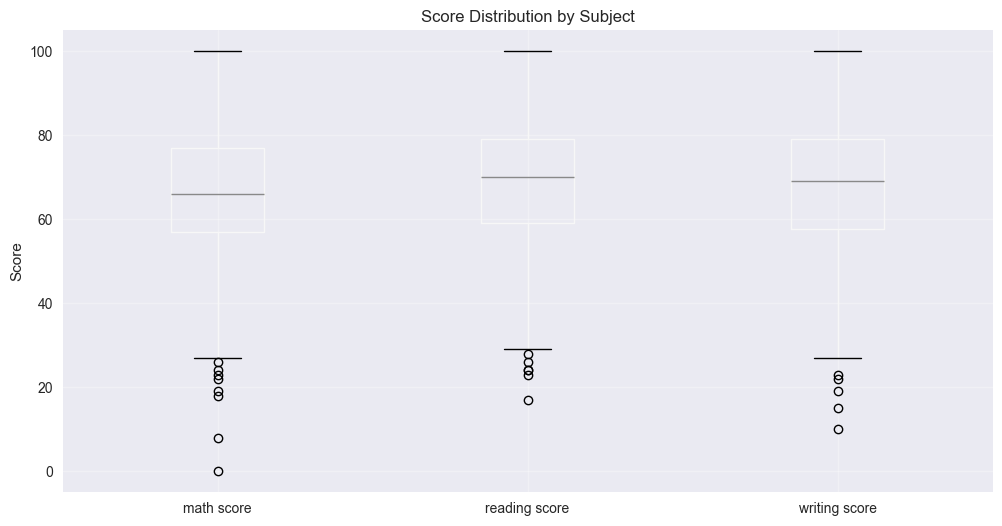

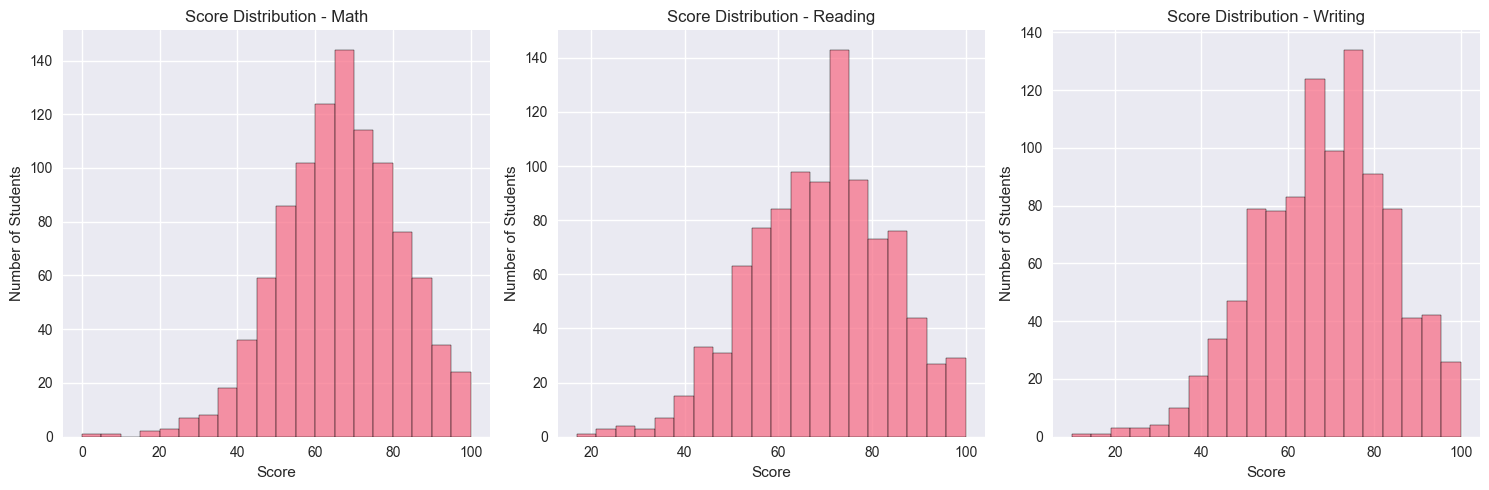

In [7]:
# Create box plot to compare score distributions
plt.figure(figsize=(12, 6))
df[['math score', 'reading score', 'writing score']].boxplot()
plt.title('Score Distribution by Subject')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)
plt.show()

# Create histogram for detailed distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
subjects = ['math score', 'reading score', 'writing score']
titles = ['Math', 'Reading', 'Writing']

for i, (subject, title) in enumerate(zip(subjects, titles)):
    sns.histplot(data=df, x=subject, bins=20, ax=axes[i])
    axes[i].set_title(f'Score Distribution - {title}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

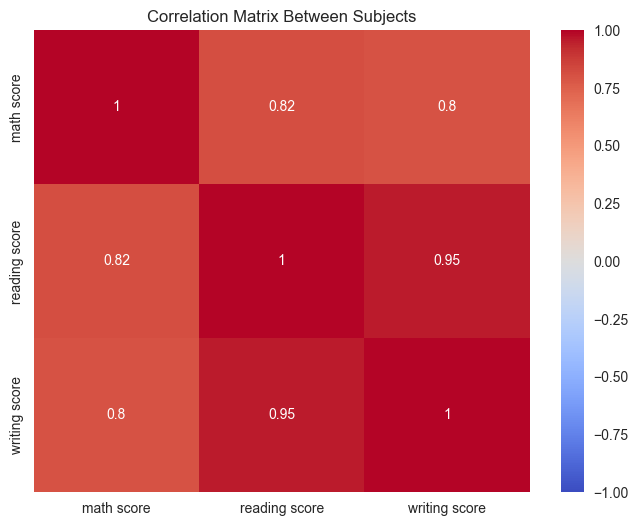

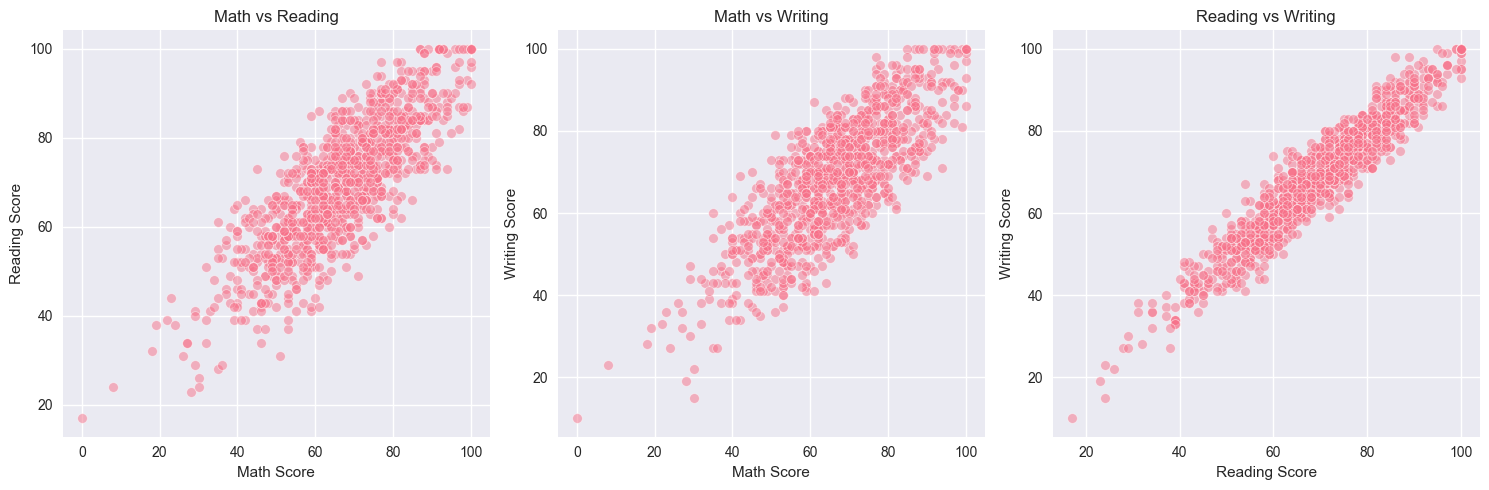

In [8]:
# Calculate correlation matrix
correlation = df[['math score', 'reading score', 'writing score']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Subjects')
plt.show()

# Create scatter plots to show relationships between subjects
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pairs = [('math score', 'reading score'), 
         ('math score', 'writing score'),
         ('reading score', 'writing score')]
titles = ['Math vs Reading', 'Math vs Writing', 'Reading vs Writing']

for i, ((x, y), title) in enumerate(zip(pairs, titles)):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x.replace('_', ' ').title())
    axes[i].set_ylabel(y.replace('_', ' ').title())

plt.tight_layout()
plt.show()

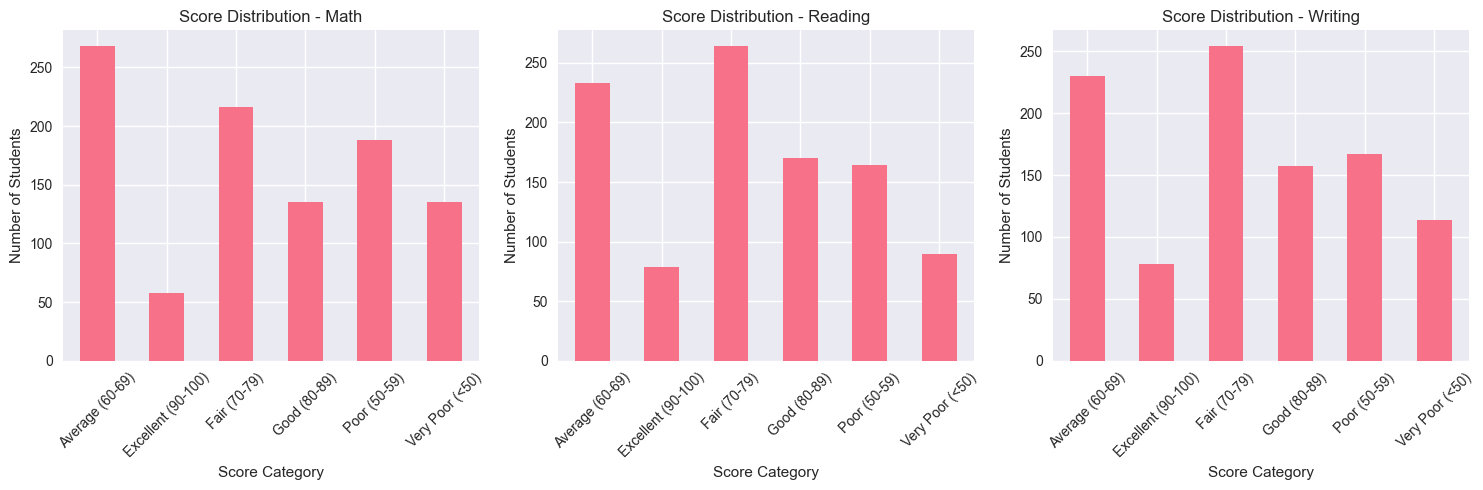

In [9]:
# Create score categories
def score_category(score):
    if score >= 90:
        return 'Excellent (90-100)'
    elif score >= 80:
        return 'Good (80-89)'
    elif score >= 70:
        return 'Fair (70-79)'
    elif score >= 60:
        return 'Average (60-69)'
    elif score >= 50:
        return 'Poor (50-59)'
    else:
        return 'Very Poor (<50)'

# Apply categorization to each subject
for subject in ['math score', 'reading score', 'writing score']:
    df[f'{subject}_category'] = df[subject].apply(score_category)

# Create comparison plot for score distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
subjects = ['math score', 'reading score', 'writing score']
titles = ['Math', 'Reading', 'Writing']

for i, (subject, title) in enumerate(zip(subjects, titles)):
    category_counts = df[f'{subject}_category'].value_counts().sort_index()
    category_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Score Distribution - {title}')
    axes[i].set_xlabel('Score Category')
    axes[i].set_ylabel('Number of Students')
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

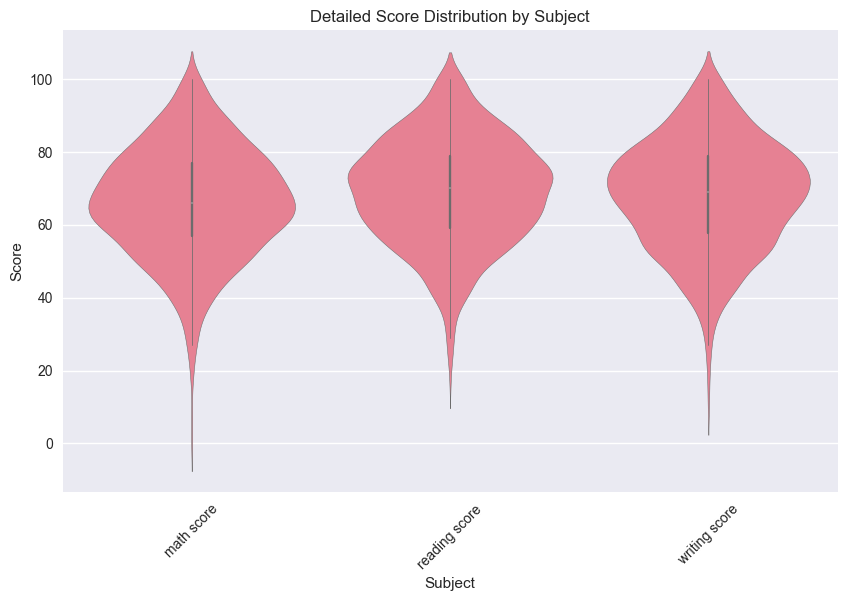


Basic Statistics for Scores:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [10]:
# Create violin plot for detailed distribution
plt.figure(figsize=(10, 6))
df[['math score', 'reading score', 'writing score']].melt().pipe(
    (sns.violinplot, 'data'), x='variable', y='value')
plt.title('Detailed Score Distribution by Subject')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Calculate basic statistics
stats_summary = df[['math score', 'reading score', 'writing score']].describe()
print("\nBasic Statistics for Scores:")
print(stats_summary)

Analysis by Gender

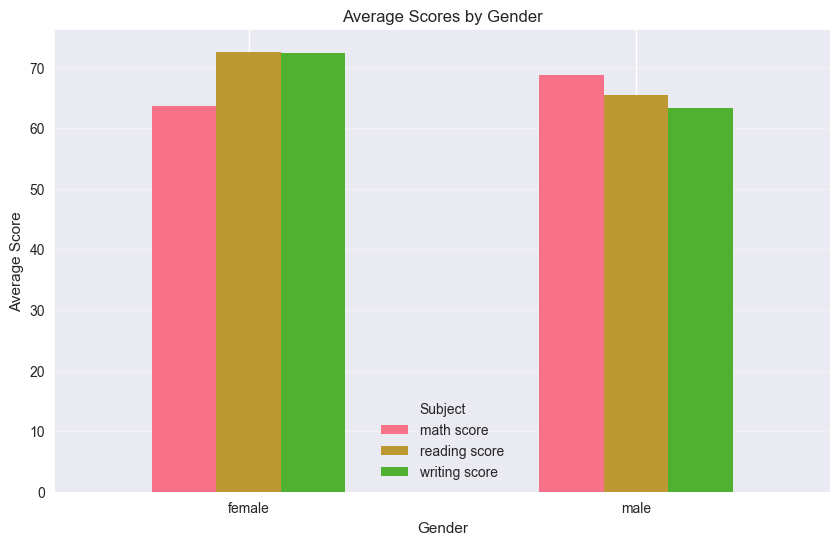

In [11]:
# Calculate mean scores by gender
mean_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Bar plot for mean scores by gender
mean_by_gender.plot(kind='bar', figsize=(10,6))
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Subject')
plt.show()

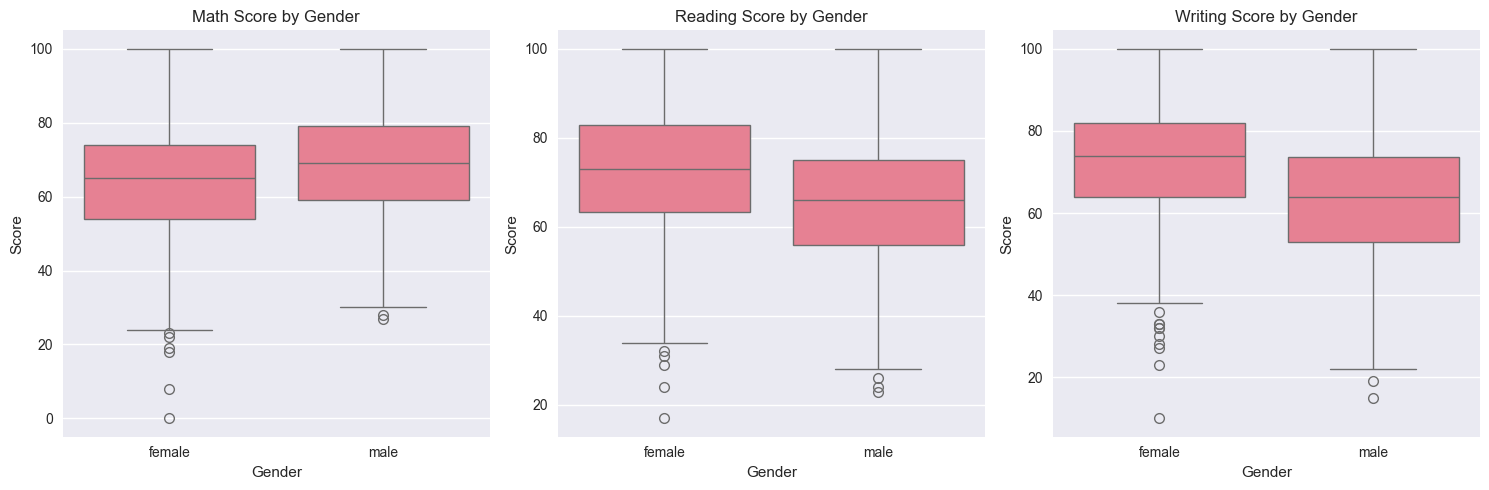

In [12]:
# Boxplot for score distribution by gender
plt.figure(figsize=(15,5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='gender', y=subject, data=df)
    plt.title(f'{subject.title()} by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Score')
plt.tight_layout()
plt.show()

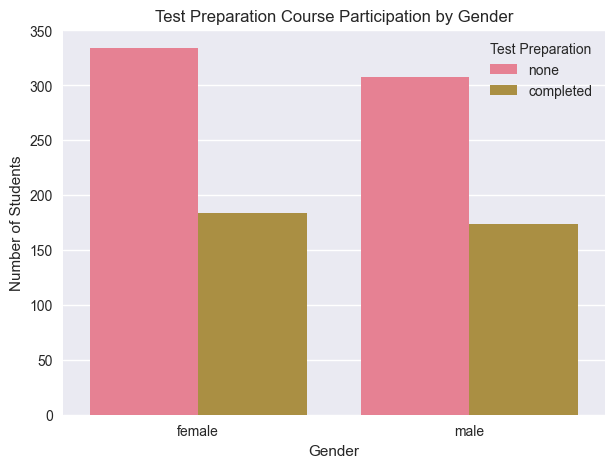

test preparation course  completed       none
gender                                       
female                   35.521236  64.478764
male                     36.099585  63.900415


In [13]:
# Countplot for test preparation course participation by gender
plt.figure(figsize=(7,5))
sns.countplot(x='gender', hue='test preparation course', data=df)
plt.title('Test Preparation Course Participation by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Test Preparation')
plt.show()

# Calculate participation rate
prep_rate = pd.crosstab(df['gender'], df['test preparation course'], normalize='index') * 100
print(prep_rate)

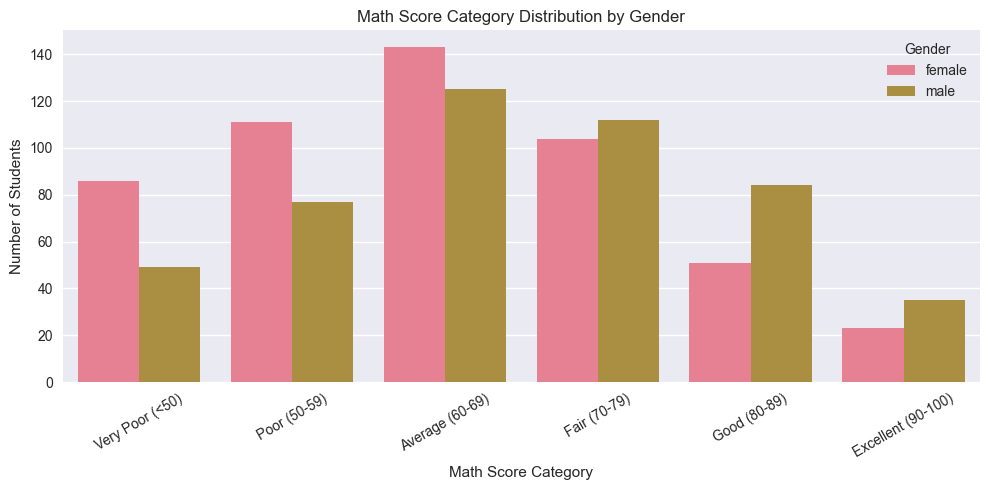

In [14]:
# Create score categories for math as an example
def score_category(score):
    if score >= 90:
        return 'Excellent (90-100)'
    elif score >= 80:
        return 'Good (80-89)'
    elif score >= 70:
        return 'Fair (70-79)'
    elif score >= 60:
        return 'Average (60-69)'
    elif score >= 50:
        return 'Poor (50-59)'
    else:
        return 'Very Poor (<50)'

for subject in ['math score', 'reading score', 'writing score']:
    df[f'{subject}_category'] = df[subject].apply(score_category)

# Plot distribution by gender for math score
plt.figure(figsize=(10,5))
sns.countplot(x='math score_category', hue='gender', data=df, order=[
    'Very Poor (<50)', 'Poor (50-59)', 'Average (60-69)', 'Fair (70-79)', 'Good (80-89)', 'Excellent (90-100)'
])
plt.title('Math Score Category Distribution by Gender')
plt.xlabel('Math Score Category')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

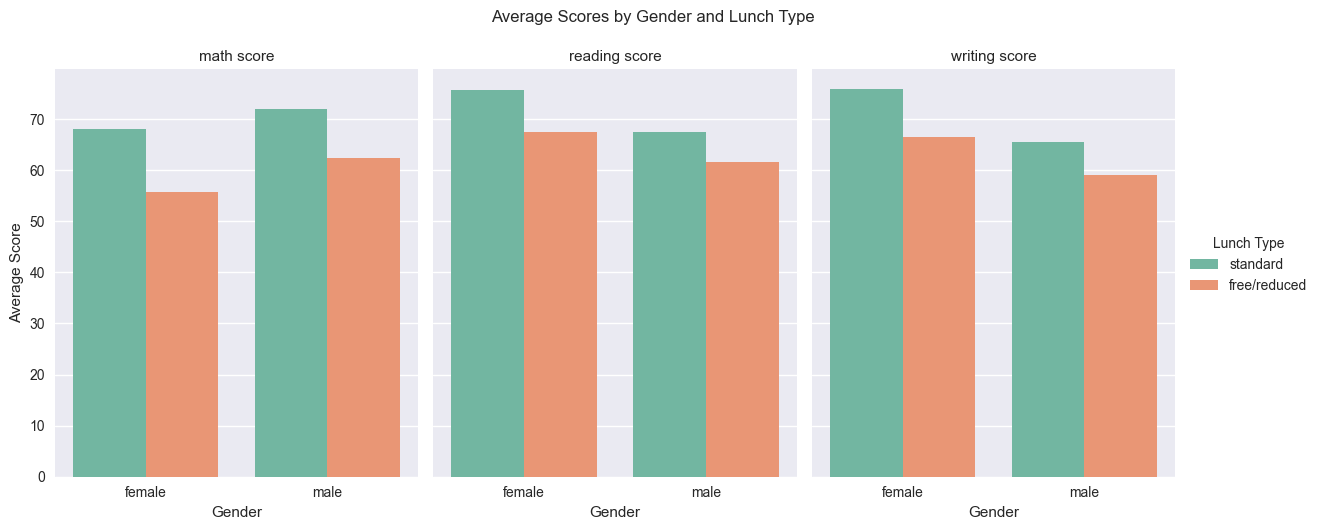

In [15]:
g = sns.FacetGrid(
    pd.melt(df, id_vars=['gender', 'lunch'], value_vars=subjects, var_name='Subject', value_name='Score'),
    col='Subject', sharey=True, height=5, aspect=0.8
)
g.map_dataframe(
    sns.barplot, 
    x='gender', 
    y='Score', 
    hue='lunch', 
    errorbar=None, 
    palette='Set2'
)
g.add_legend(title='Lunch Type')
g.set_axis_labels('Gender', 'Average Score')
g.set_titles('{col_name}')
plt.suptitle('Average Scores by Gender and Lunch Type', y=1.05)
plt.show()

Analysis by Parental Education Level

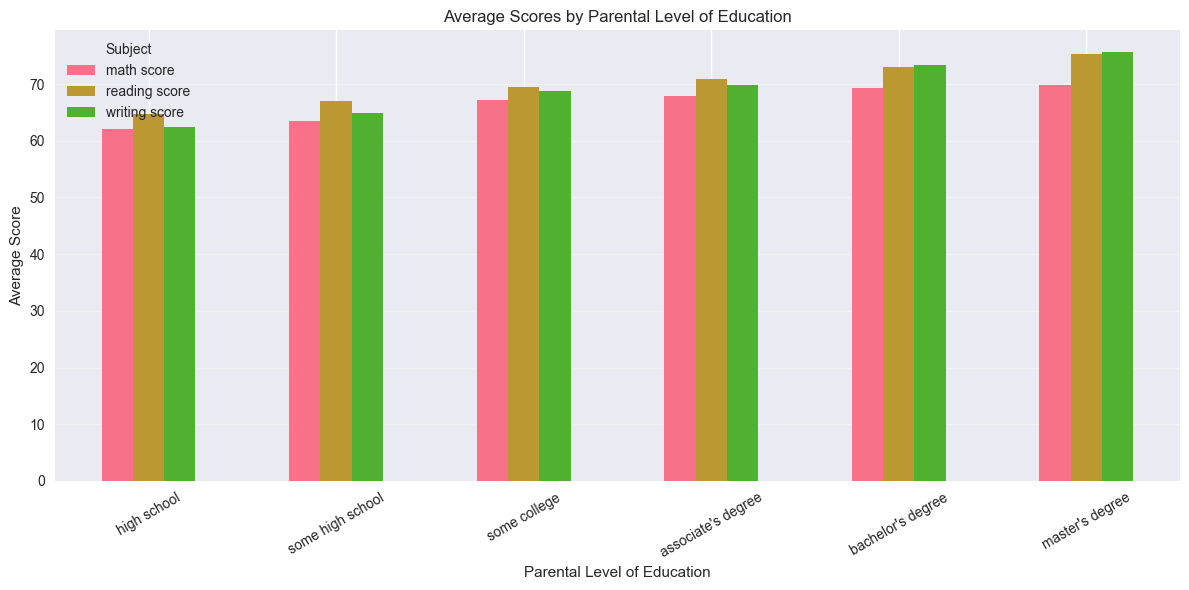

In [16]:
# Calculate mean scores by parental level of education
mean_by_edu = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().sort_values('math score')

# Bar plot for mean scores by parental education
mean_by_edu.plot(kind='bar', figsize=(12,6))
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

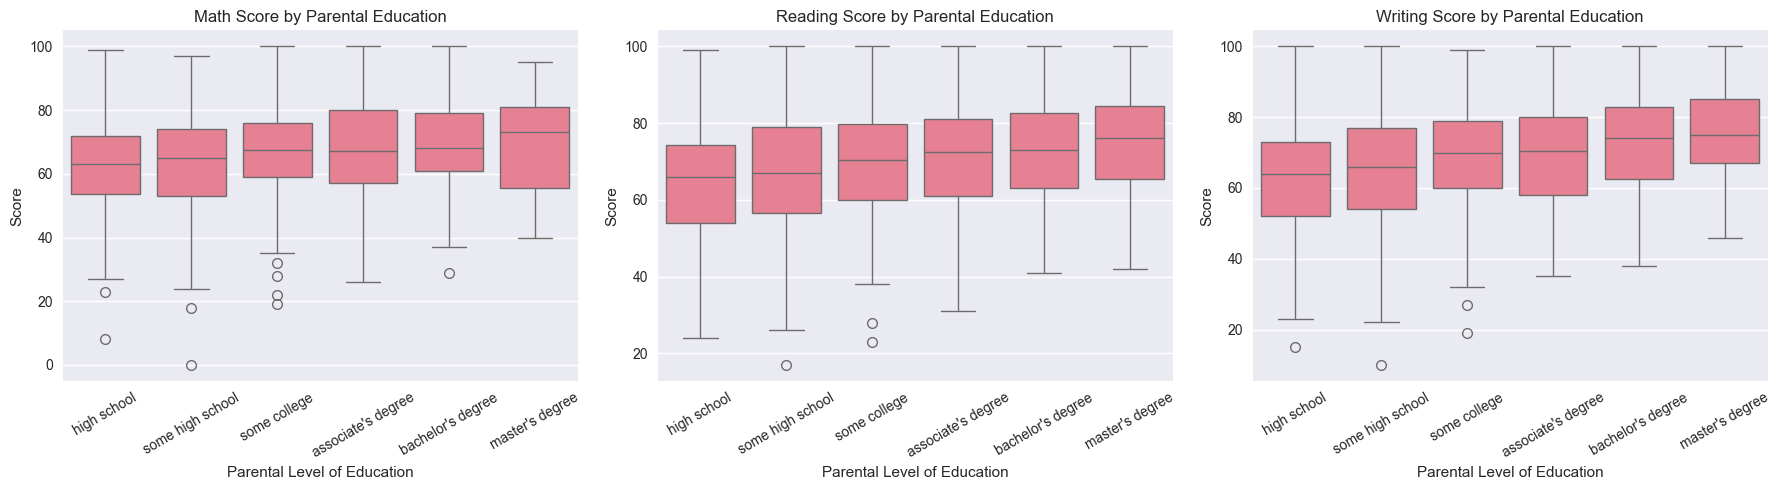

In [17]:
# Boxplot for score distribution by parental education
plt.figure(figsize=(18,5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='parental level of education', y=subject, data=df, order=mean_by_edu.index)
    plt.title(f'{subject.title()} by Parental Education')
    plt.xlabel('Parental Level of Education')
    plt.ylabel('Score')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

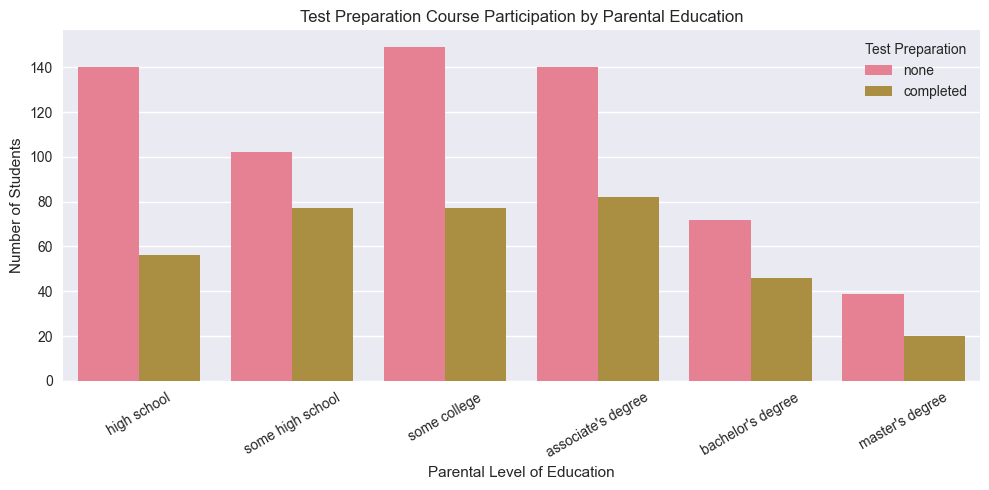

test preparation course      completed       none
parental level of education                      
associate's degree           36.936937  63.063063
bachelor's degree            38.983051  61.016949
high school                  28.571429  71.428571
master's degree              33.898305  66.101695
some college                 34.070796  65.929204
some high school             43.016760  56.983240


In [18]:
# Countplot for test preparation course participation by parental education
plt.figure(figsize=(10,5))
sns.countplot(x='parental level of education', hue='test preparation course', data=df, order=mean_by_edu.index)
plt.title('Test Preparation Course Participation by Parental Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')
plt.legend(title='Test Preparation')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Calculate participation rate
prep_rate_edu = pd.crosstab(df['parental level of education'], df['test preparation course'], normalize='index') * 100
print(prep_rate_edu)

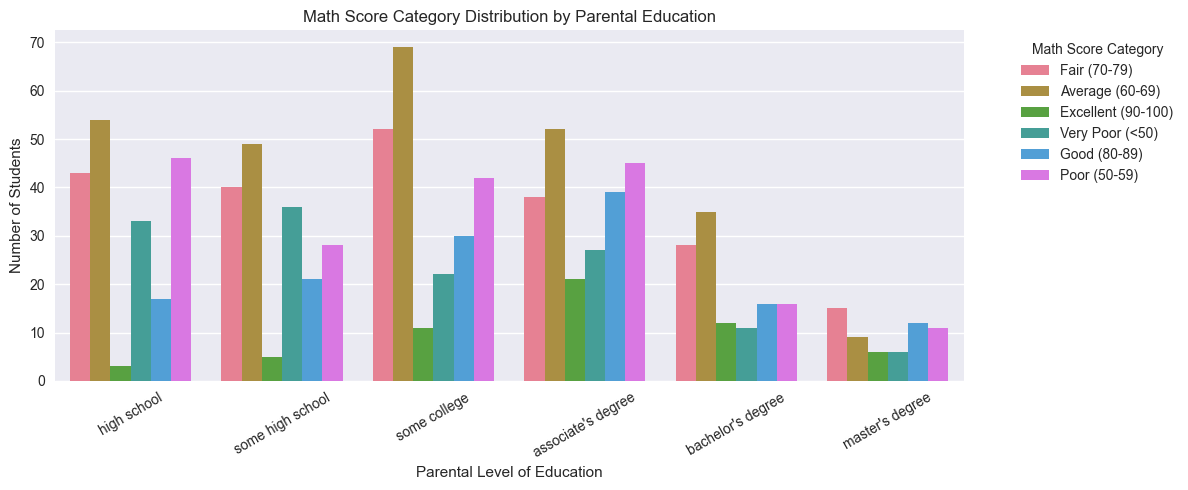

In [19]:
# Countplot for math score category by parental education
plt.figure(figsize=(12,5))
sns.countplot(x='parental level of education', hue='math score_category', data=df, order=mean_by_edu.index)
plt.title('Math Score Category Distribution by Parental Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')
plt.legend(title='Math Score Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

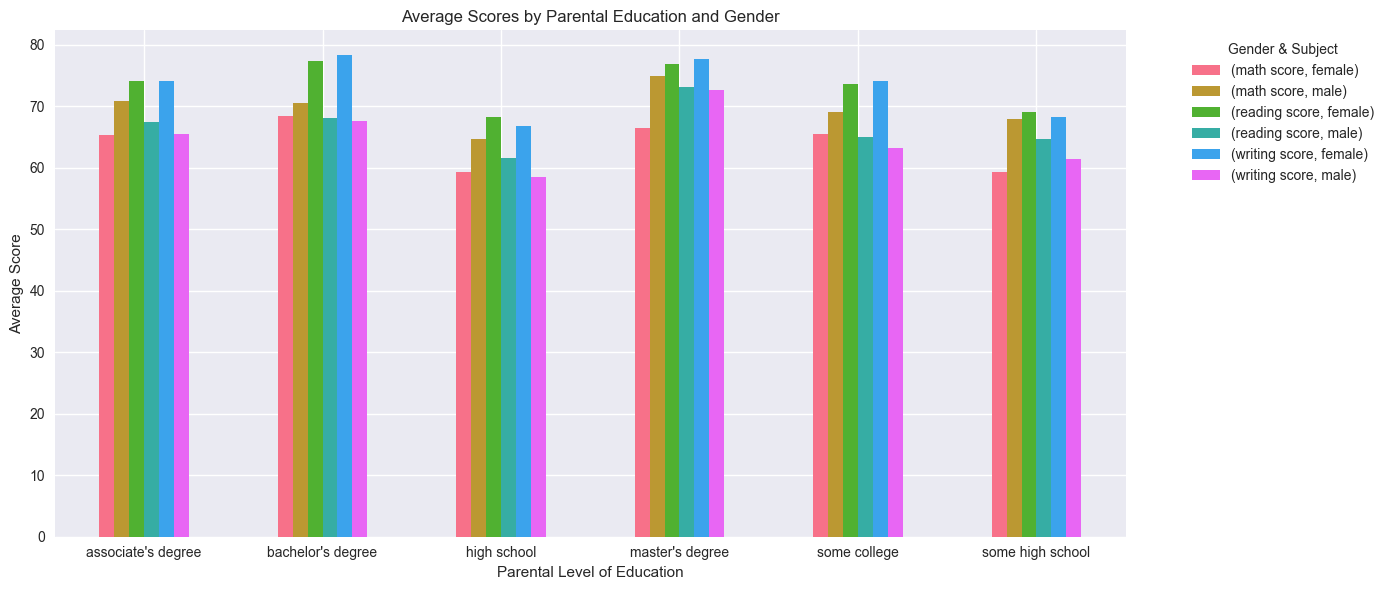

In [20]:
# Average scores by parental education and gender
mean_edu_gender = df.groupby(['parental level of education', 'gender'])[['math score', 'reading score', 'writing score']].mean().unstack()
mean_edu_gender.plot(kind='bar', figsize=(14,6))
plt.title('Average Scores by Parental Education and Gender')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=0)
plt.legend(title='Gender & Subject', bbox_to_anchor=(1.05, 1), loc='upper left')  # Di chuyển chú thích ra ngoài
plt.tight_layout()
plt.show()

Lunch Analysis

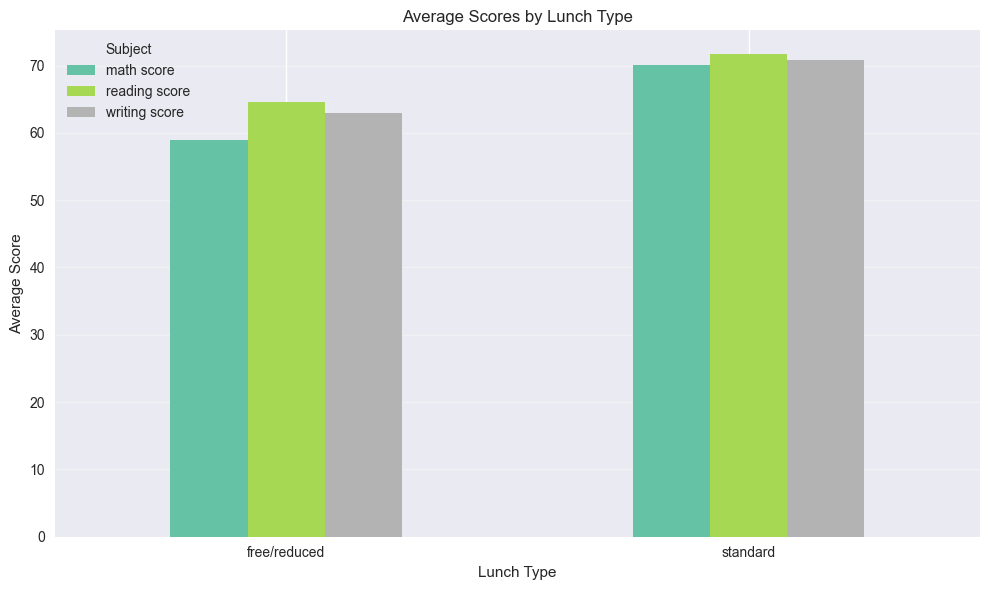

In [21]:
# Compare average scores for each subject between lunch types
mean_by_lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
mean_by_lunch.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Average Scores by Lunch Type')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

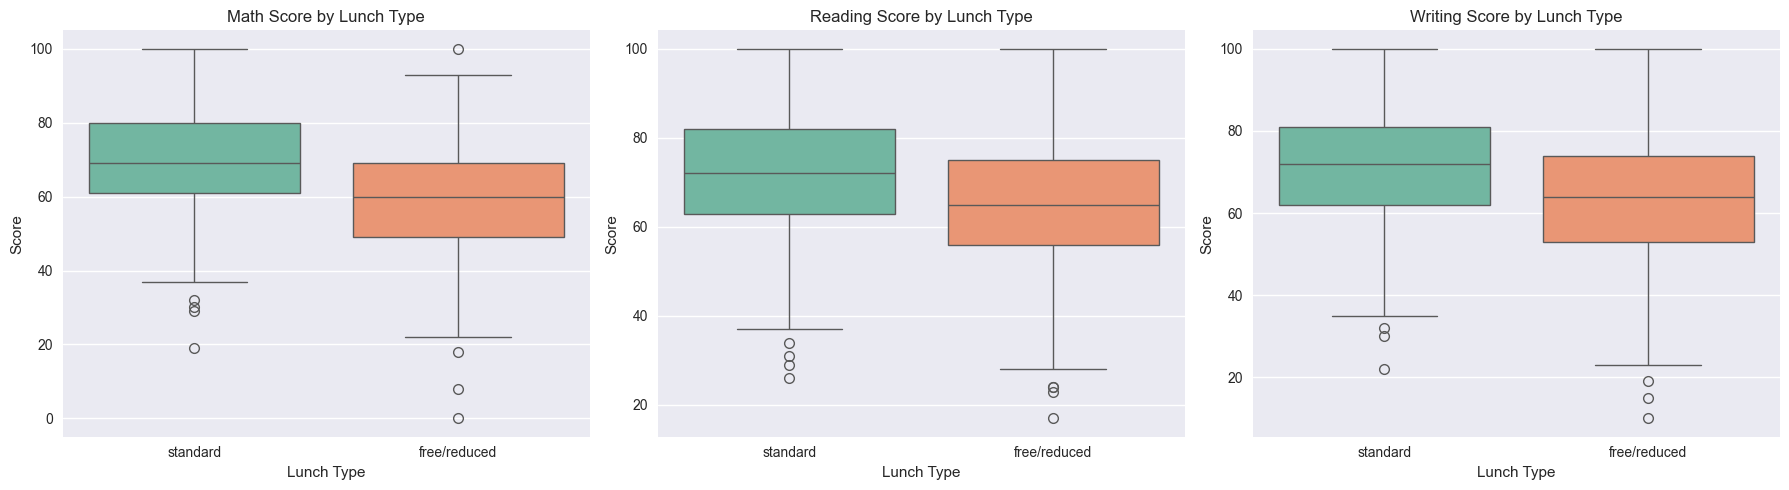

In [22]:
# Show score distributions for each subject by lunch type using boxplots
plt.figure(figsize=(18,5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='lunch', y=subject,hue='lunch', data=df, palette='Set2')
    plt.title(f'{subject.title()} by Lunch Type')
    plt.xlabel('Lunch Type')
    plt.ylabel('Score')
plt.tight_layout()
plt.show()

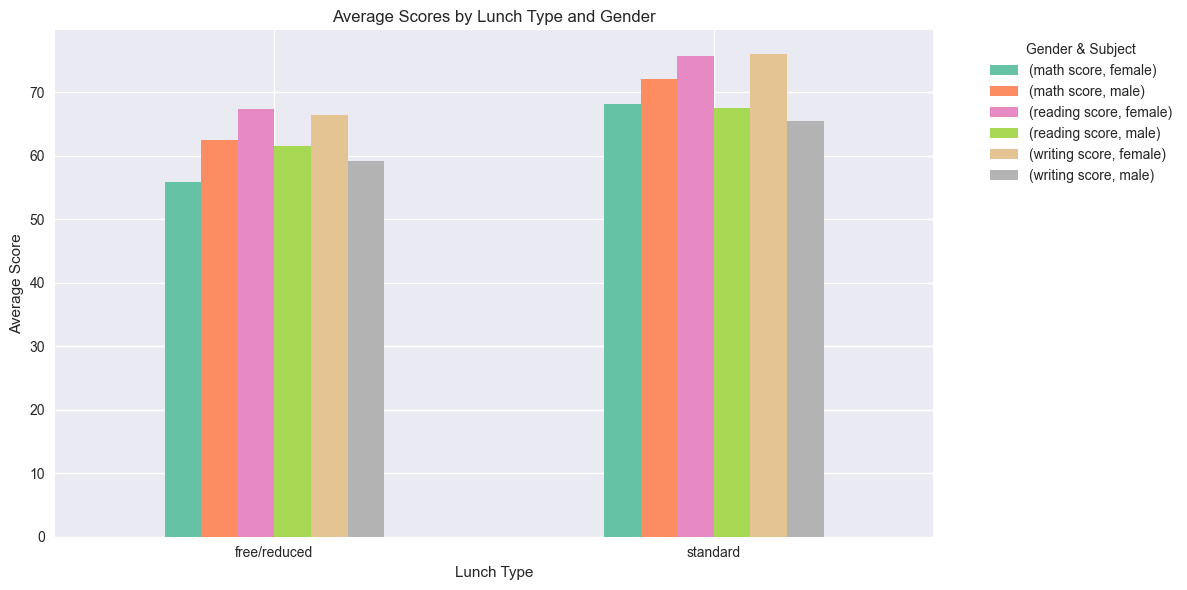

In [23]:
# 3. Compare average scores by lunch type and gender
mean_lunch_gender = df.groupby(['lunch', 'gender'])[['math score', 'reading score', 'writing score']].mean().unstack()
mean_lunch_gender.plot(kind='bar', figsize=(12,6), colormap='Set2')
plt.title('Average Scores by Lunch Type and Gender')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')
plt.xticks(rotation=0) 
plt.legend(title='Gender & Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analysis by Race, Ethnicity

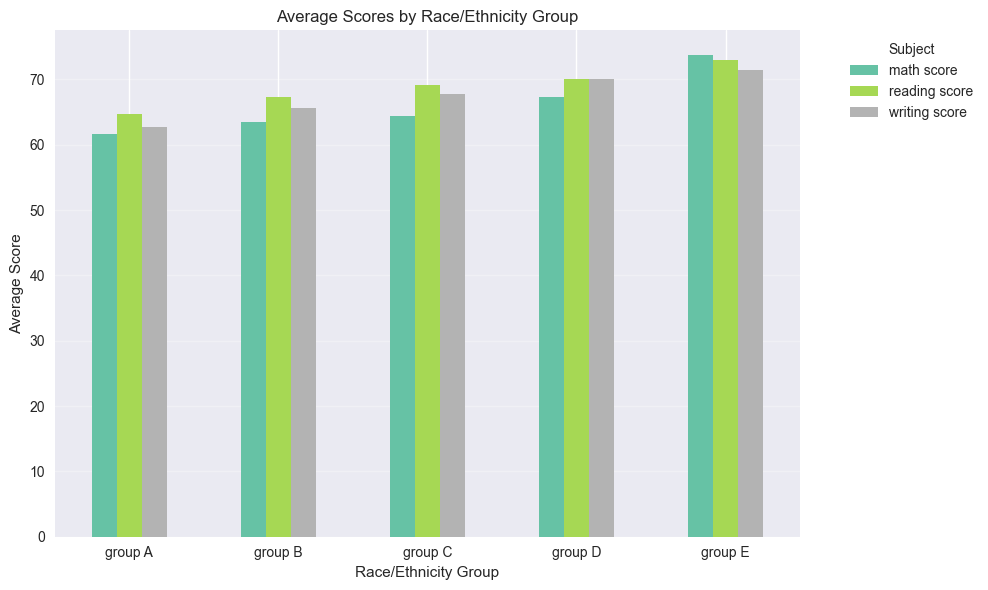

In [24]:
# Compare average scores for each subject between race/ethnicity groups
mean_by_race = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
mean_by_race.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Average Scores by Race/Ethnicity Group')
plt.ylabel('Average Score')
plt.xlabel('Race/Ethnicity Group')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

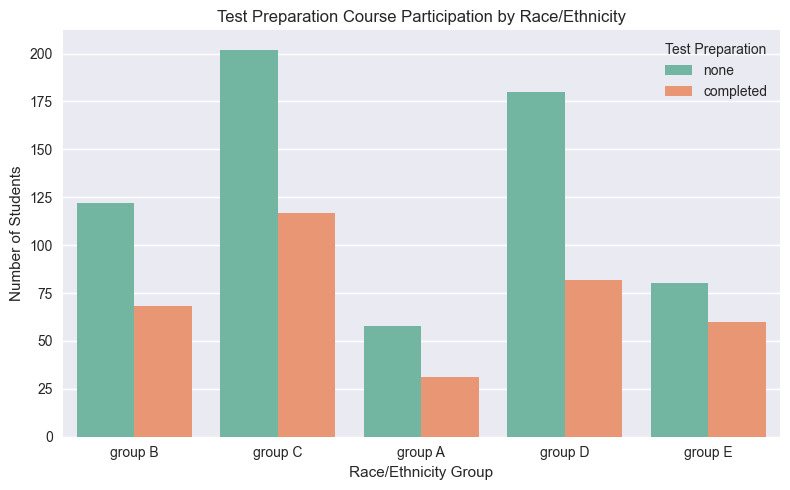

test preparation course  completed       none
race/ethnicity                               
group A                  34.831461  65.168539
group B                  35.789474  64.210526
group C                  36.677116  63.322884
group D                  31.297710  68.702290
group E                  42.857143  57.142857


In [25]:
# Show participation rate in test preparation course by race/ethnicity (countplot and percentage table)
plt.figure(figsize=(8,5))
sns.countplot(x='race/ethnicity', hue='test preparation course', data=df, palette='Set2')
plt.title('Test Preparation Course Participation by Race/Ethnicity')
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Number of Students')
plt.legend(title='Test Preparation')
plt.tight_layout()
plt.show()

# Calculate and print participation rate by race/ethnicity
prep_rate_race = pd.crosstab(df['race/ethnicity'], df['test preparation course'], normalize='index') * 100
print(prep_rate_race)

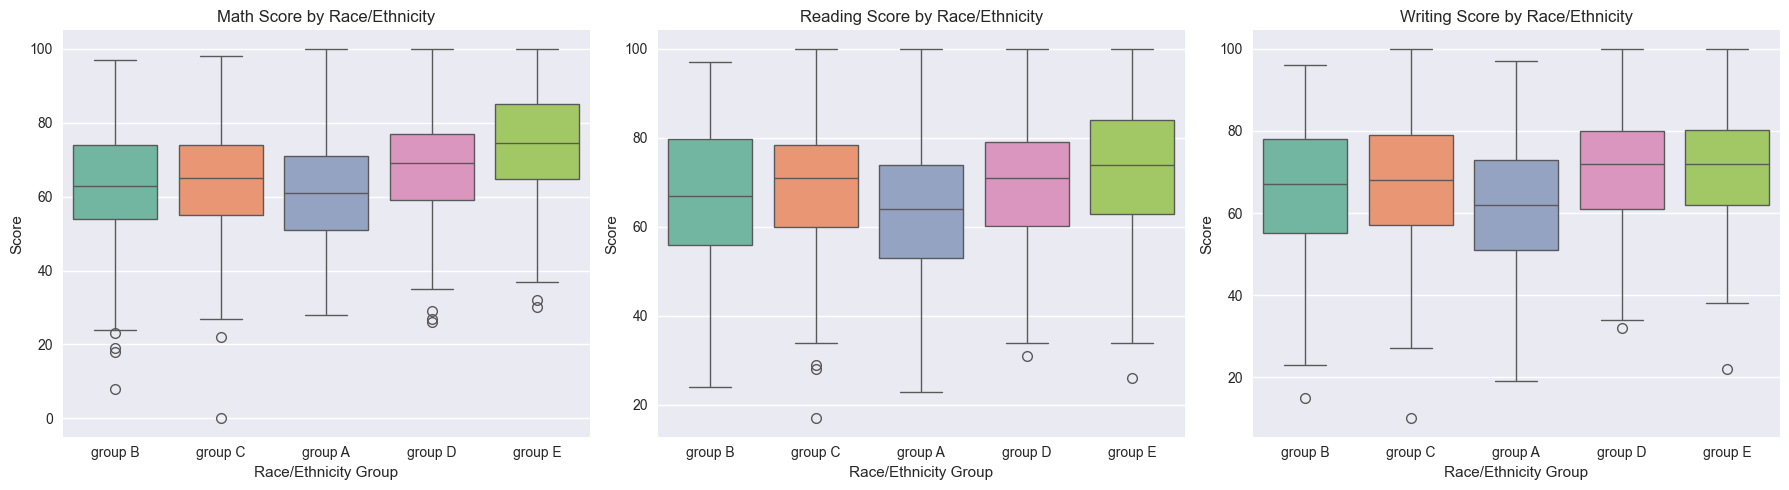

In [26]:
# Show score distributions for each subject by race/ethnicity using boxplots
plt.figure(figsize=(18,5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='race/ethnicity', y=subject, hue='race/ethnicity', data=df, palette='Set2')
    plt.title(f'{subject.title()} by Race/Ethnicity')
    plt.xlabel('Race/Ethnicity Group')
    plt.ylabel('Score')
plt.tight_layout()
plt.show()